<IPython.core.display.Javascript object>


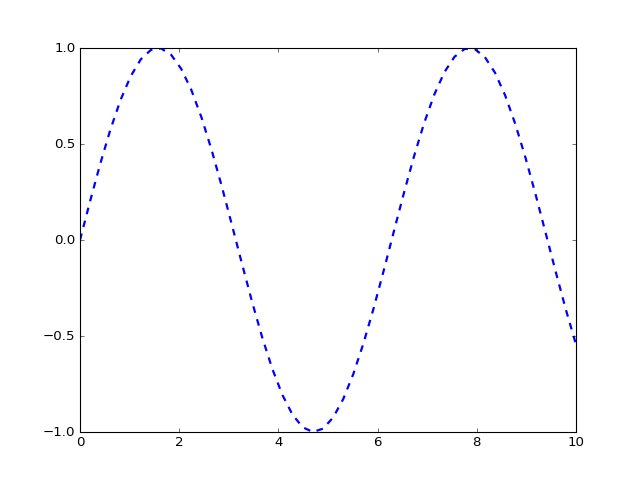

In [4]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(0, 10)
line, = plt.plot(xs, np.sin(xs), '--', linewidth=2)

<IPython.core.display.Javascript object>


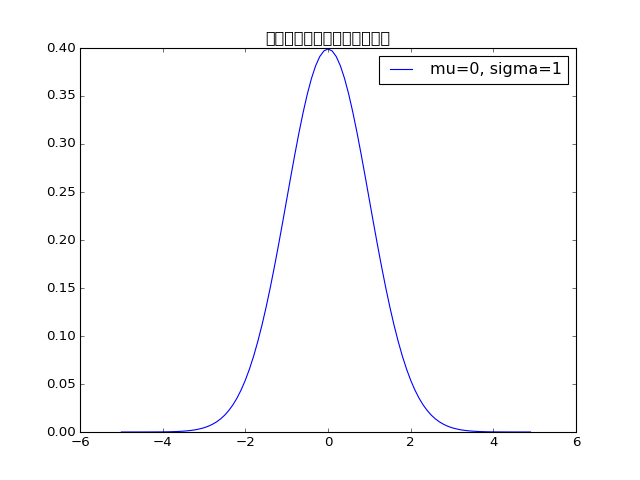

hello


In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import math

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu)**2/2/sigma**2) / (sqrt_two_pi * sigma))

xs = [ x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.legend()
plt.title('多个正态分布的概率密度函数')
plt.show()

<IPython.core.display.Javascript object>


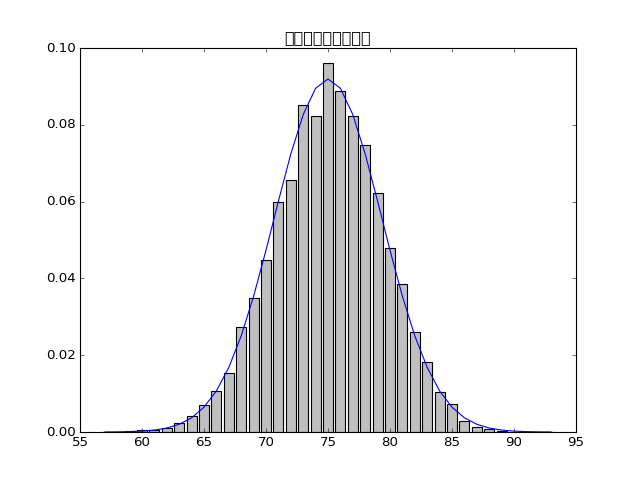

In [2]:
%matplotlib notebook
# 中心极限定理

import matplotlib.pyplot as plt
import random
import math
from collections import Counter


def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2


def bernoulli_trial(p):
    return 1 if random.random() < p else 0


def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))


def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    
    # 用条形图绘出实际的二项式文本
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8, color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # 用线形图绘出正态近似
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i+0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title('二项分布与正态近似')
    plt.show()
    
make_hist(0.75, 100, 10000)